Importamos las librerias que usaremos e importamos el conjunto de datos

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Modulos para escalonado 
from sklearn.preprocessing import scale, MinMaxScaler

### **Descripcion del conjunto de datos**

### **Analisis exploratorio**

In [55]:
file = 'heart_failure_clinical_records_dataset.csv'
heart_df = pd.read_csv(file)
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Revisión de datos nulos y tipo de datos

In [56]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


NO existe presencia de datos nulos en esta muestra.


TODOS los datos son numéricos

### Revisión general del comportamiento de los datos 

Número total, media, desviasión estandar, mínimo, cuartiles, máximo

In [57]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Notemos que las columnas "anaemia", "diabetes", "high_blood_pressure", "sex", "smoking" y "DEATH_EVENT" tienen comportamiento de valores cualitativos binarios.

La información proporcionada en este dataset, nos dice que los 0 representan un NO y 1 un SI

Debido a la naturaleza del clustering vamos a prescindir de las estas columnas a excepción de del evento de muerte, debido a que va a ser el valor a predecir.

### Seleción de columnas continuas

In [58]:
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols=columns)

### Definición de funciones para la graficación

In [60]:
# Calcular el coeficiente de Fisher
def fisher(media, mediana, desviacion_estandar):
  coef_fisher = 3 * (media - mediana) / desviacion_estandar
  # Interpretación
  if coef_fisher < 0:
      return f"La distribución está sesgada negativamente.\nFischer = {round(coef_fisher, 4)}"
  elif coef_fisher > 0:
      return f"La distribución está sesgada positivamente.\nFischer = {round(coef_fisher, 4)}"
  else:
      return f"La distribución es simétrica.\nFischer = {round(coef_fisher, 4)}"


# Calcular el coeficiente de curtosis
def curtosis(coef_curtosis):
    # Interpretación
    if coef_curtosis > 0:
        return f"La distribución es leptocúrtica.\n(colas más pesadas y puntiaguda en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
    elif coef_curtosis < 0:
        return f"La distribución es platicúrtica.\n(colas más ligeras y aplanada en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
    else:
        return f"La distribución es mesocúrtica.\n(similar a la distribución normal)\nCurtosis = {round(coef_curtosis, 4)}"

def grafica(data, column, axs, i):
    colores = ['lightblue', 'lightgreen', 'lightcoral', 'lavender', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightgray', 'peachpuff']

    sns.boxplot(y=data[column], ax=axs[i, 0], color=colores[i])
    sns.histplot(data[column], ax=axs[i, 1], bins=30, kde=True, color=colores[i])

    # Fisher texto
    texto = fisher(data[column].mean(), data[column].median(), data[column].std())
    axs[i, 1].text(0.1, 0.8, texto, transform=axs[i, 1].transAxes, fontsize=9)
    
    # Curtosis texto
    texto = curtosis(data[column].kurtosis())
    axs[i, 1].text(0.1, 0.5, texto, transform=axs[i, 1].transAxes, fontsize=9)
    axs[i, 1].set_xlabel('')

### Graficación de caja y bigotes y frecuencias

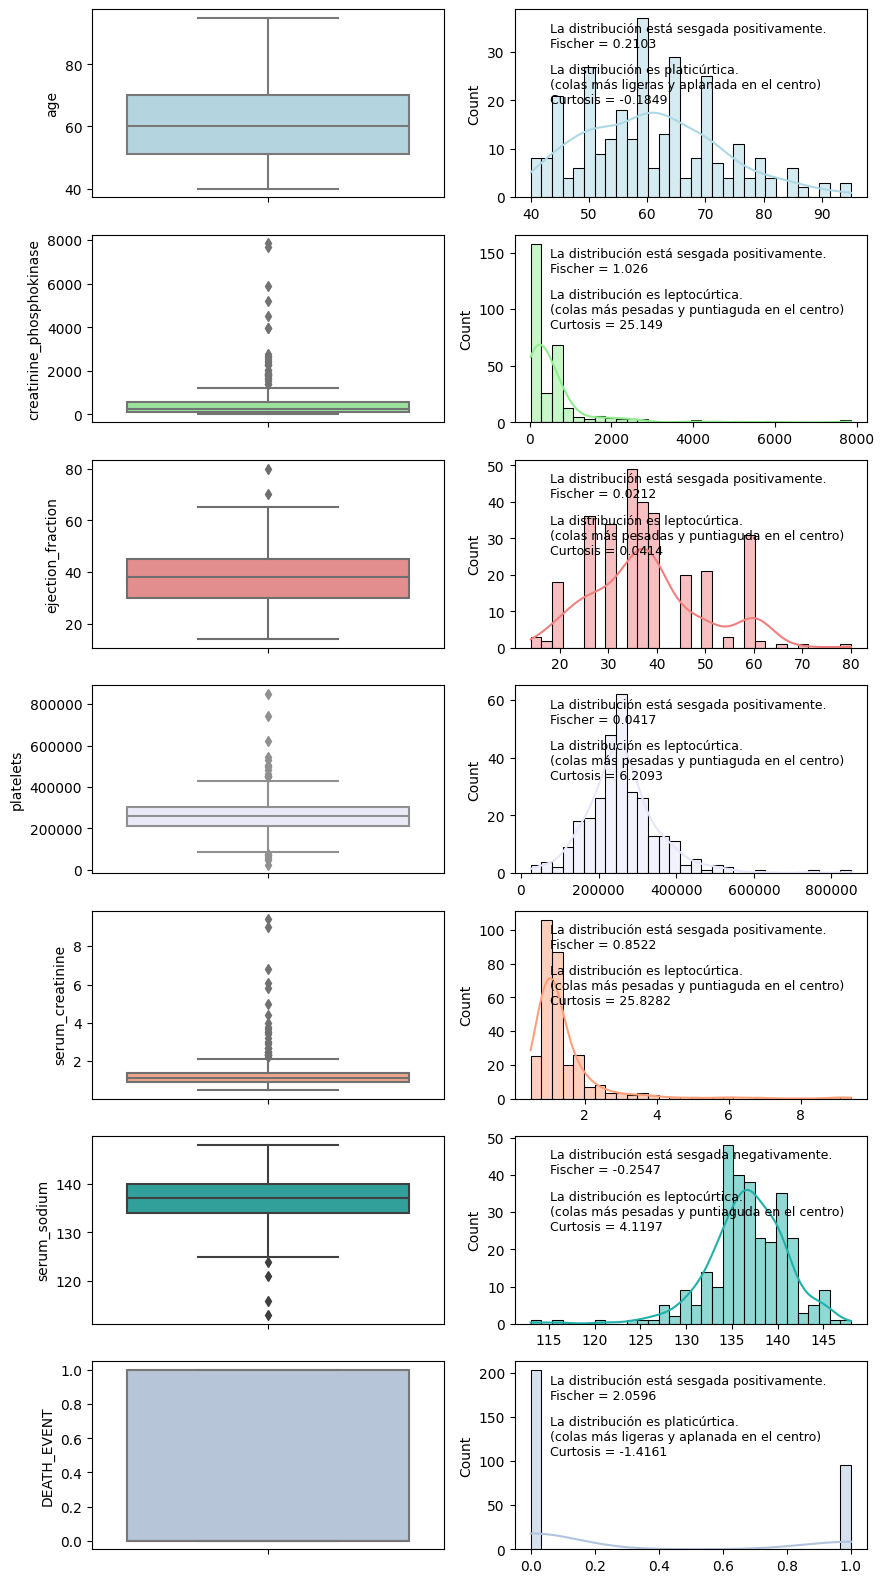

In [61]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
i = 0

for column in heart_df.columns:
    grafica(heart_df, column, axs, i)
    i += 1

plt.show()

### Remoción de datos atípicos

In [63]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

Se decidió utilizar los límites de los bigotes como valor que va a ser reemplazado en los datos atípicos. Esto debido a los posibles errores en la toma de datos y a que en un modelo predictivo es recomendable mantener estos datos cercanos al original. 

In [64]:
for i in heart_df.columns:
    heart_df[i] = remove_outliers_iqr(heart_df[i])

### Mapa de calor y gráficos con los datos reemplazados

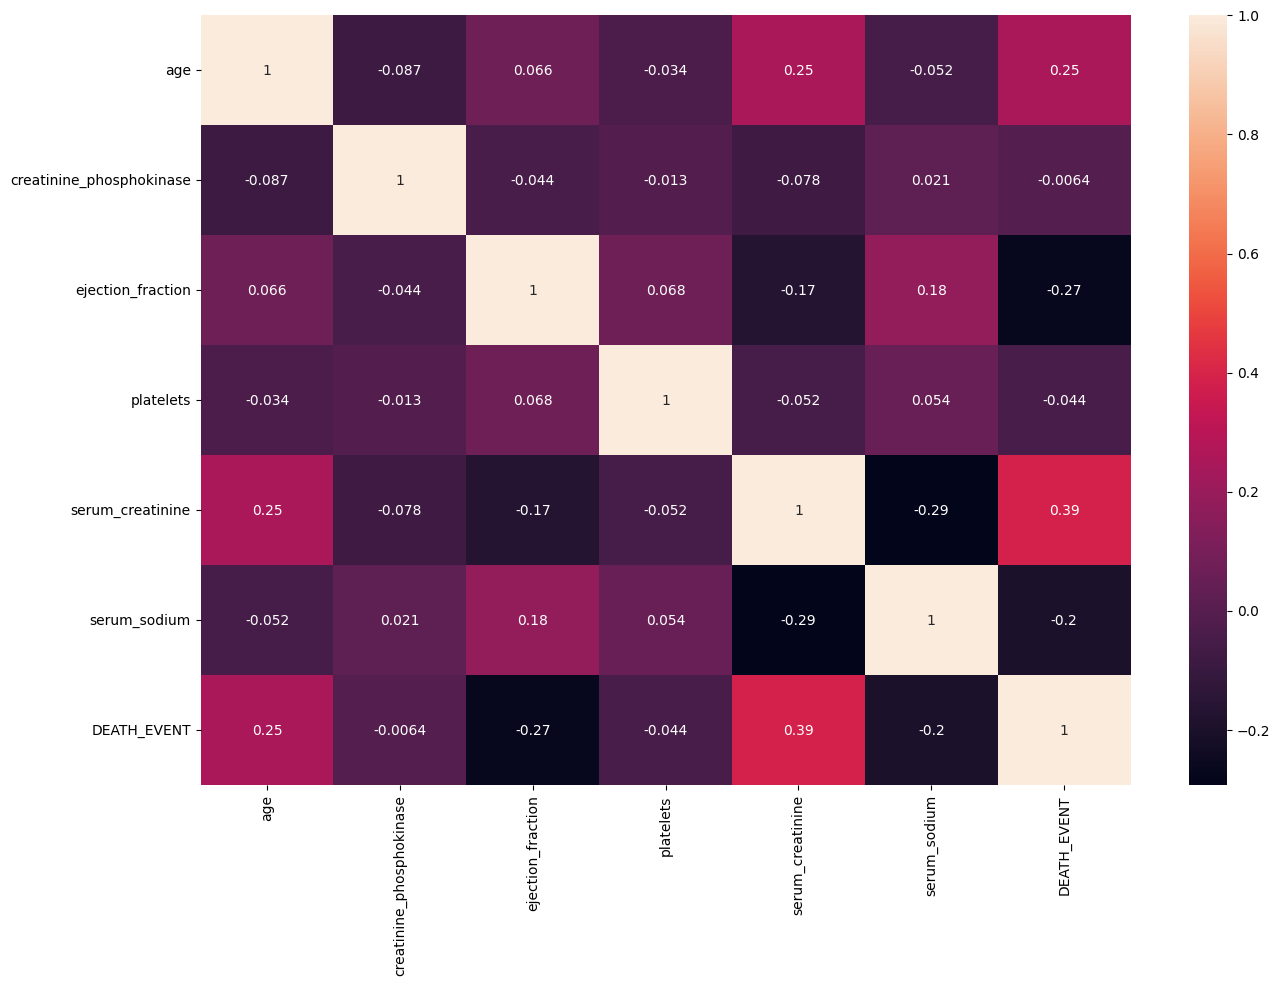

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_df.corr(),fmt='.2g',annot=True)
plt.show()

NO EXISTE correlación significativa entre las columnas.

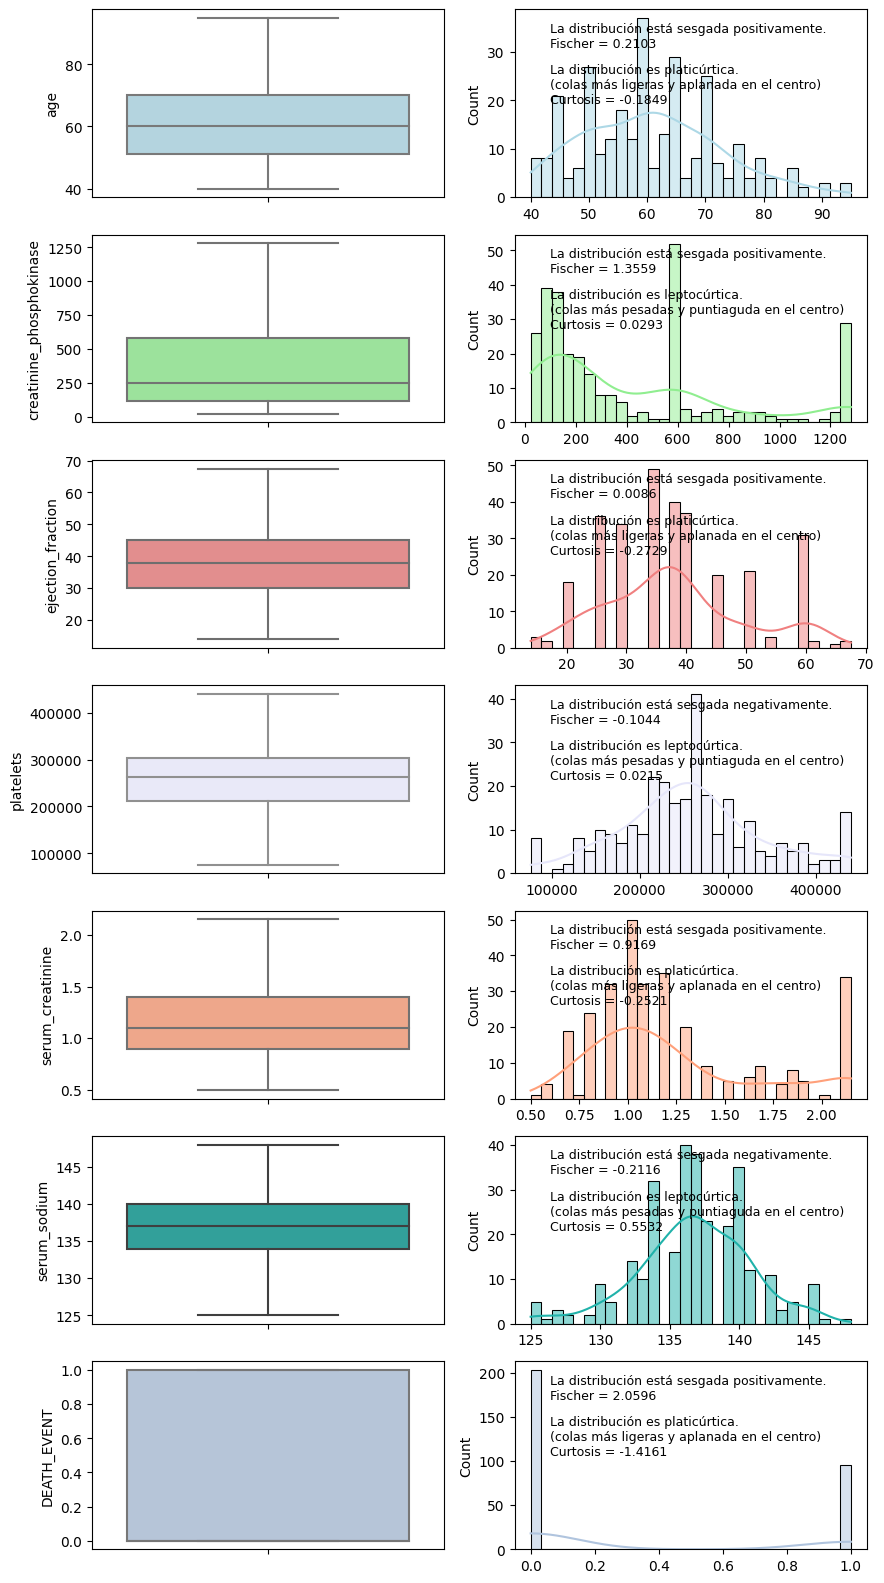

In [66]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
i = 0

for column in heart_df.columns:
    grafica(heart_df, column, axs, i)
    i += 1

plt.show()

Debido a que reemplazamos los datos atípicos se crearon una acumulación de datos en los bordes de las gráficas de frecuencias cambiando las formas de las gráficas, sin embargo, no es necesario considerar la forma de las gráficas para el modelo.

### **Reducción de dimensiones**

In [32]:
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols= columns)

**Matriz de correlación**

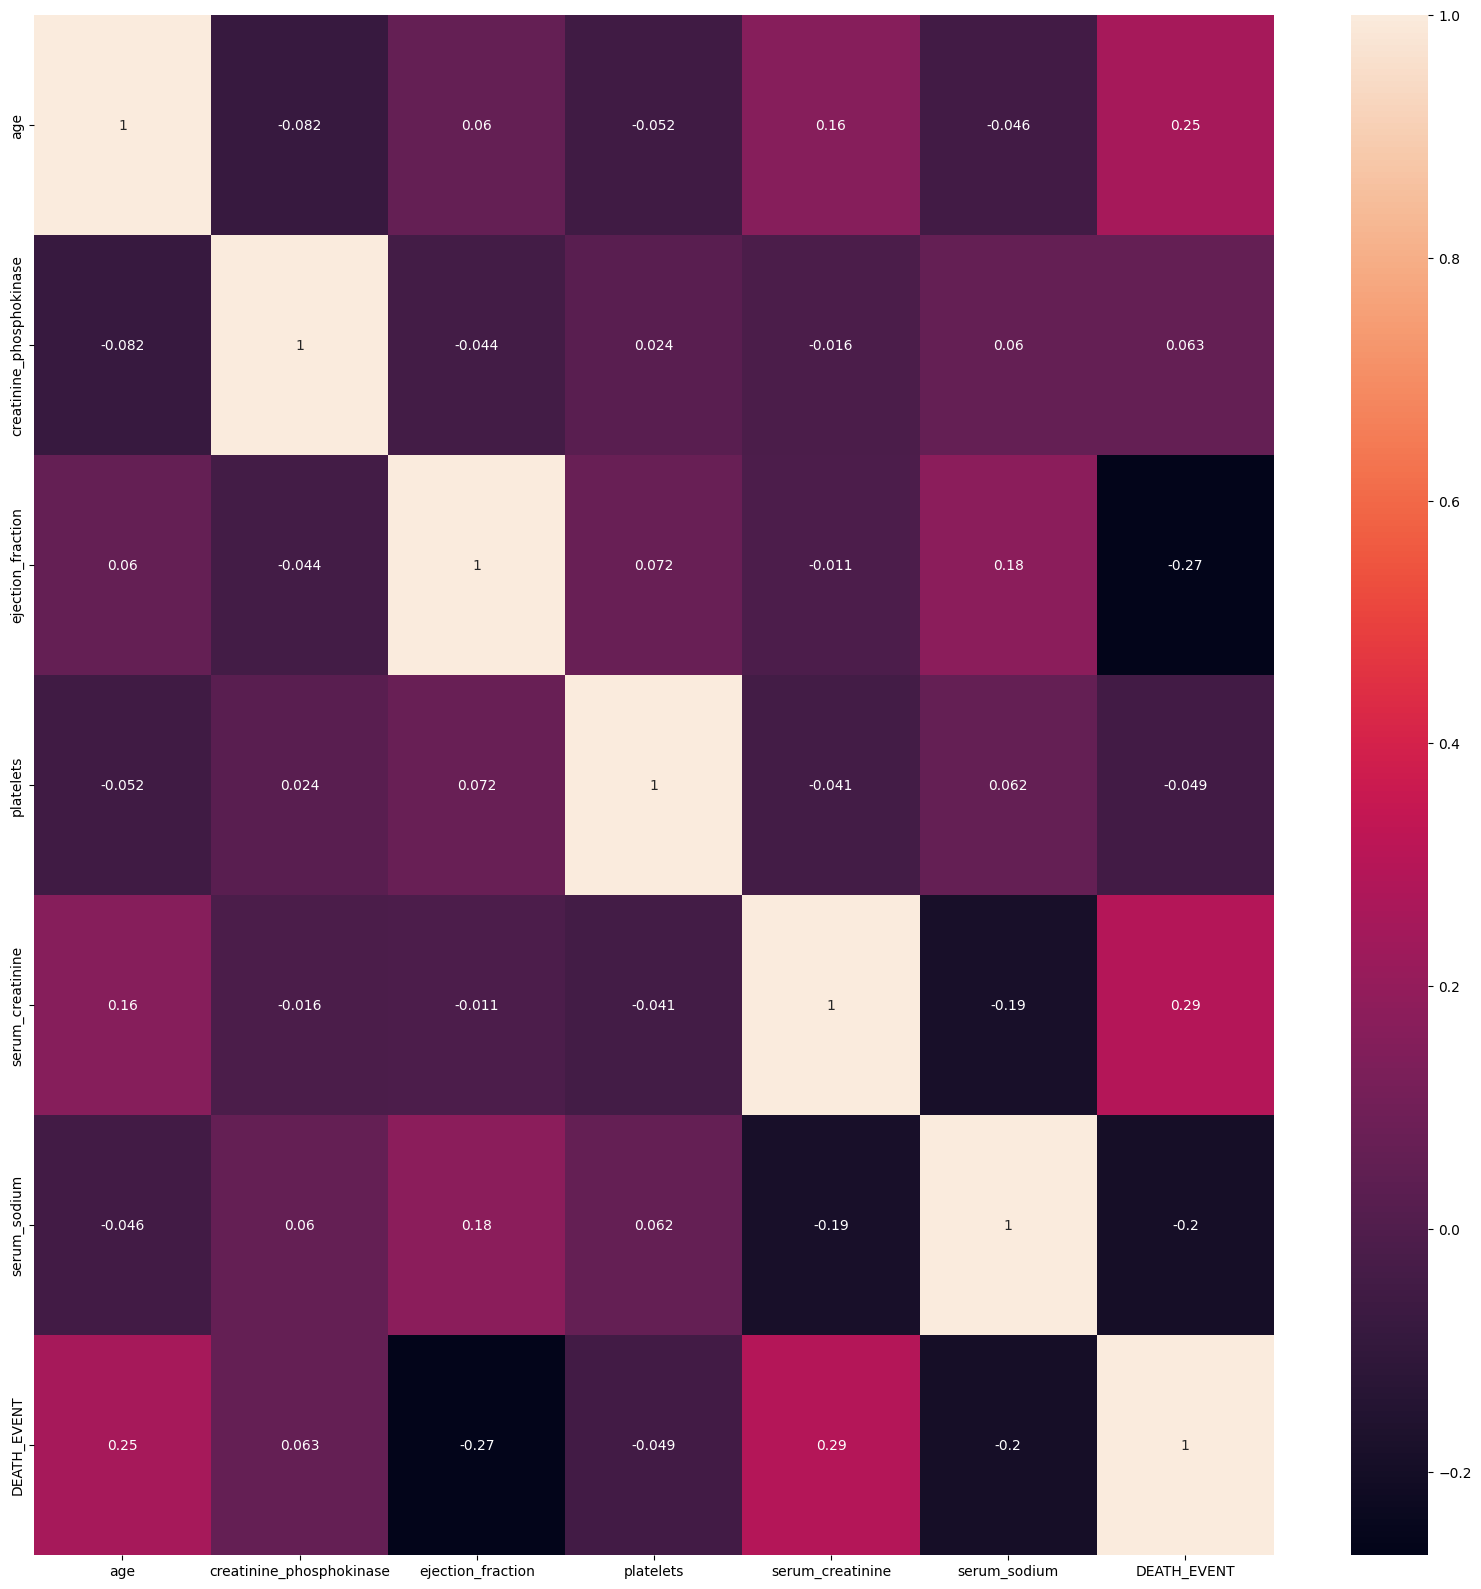

In [4]:
corr_data = heart_df.corr()

plt.figure(figsize= (20,20))
sns.heatmap(corr_data, fmt='.2g', annot= True)
plt.show()

No se elimina ninguna variables porque no existe una correlacion fuerte entre ellas, igualmente se puede evidenciar esto en el grafico de barras que realizamos posteriormente con las variables estandarizadas, demostrando asi que cada variable suministra informacion valiosa

**Estandarizacion de variables**

In [5]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(heart_df)
df_estand = pd.DataFrame(df_estand, columns=heart_df.columns)

pca = PCA(n_components= 7) # Numero 7 por el numero de variables
data_pca = pca.fit_transform(df_estand)

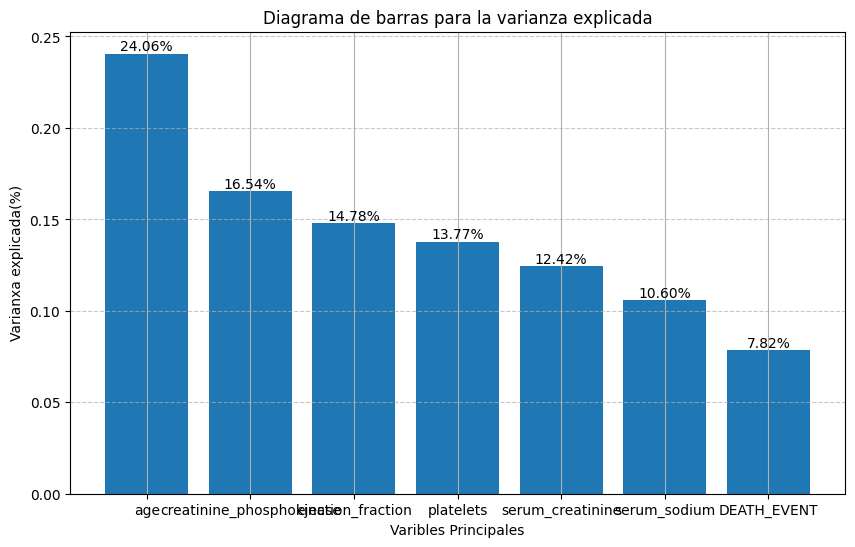

In [27]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize= (10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Varibles Principales')
plt.ylabel('Varianxa explicada(%)')
plt.title('Diagrama de barras para la varianza explicada')
plt.xticks(range(1,8), columns)
plt.grid(True)

# Para poner el label en cada barra
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

In [30]:
data_pca = pd.DataFrame(data_pca, columns= columns)
data_pca

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,2.636087,0.481736,-0.055057,0.403632,-0.729775,-0.662050,0.254990
1,0.474593,3.862572,5.219342,-2.854949,1.899451,-2.153478,-0.380228
2,2.363040,0.978129,-1.257243,-0.020346,-0.503538,-0.584041,-0.385591
3,1.351887,1.225824,-0.553656,0.034797,-0.454394,1.379707,-0.569019
4,3.952849,1.021145,-0.992056,2.597876,0.965151,-1.837876,0.082067
...,...,...,...,...,...,...,...
294,-0.913537,-0.440570,-0.723542,-1.248903,-0.480557,0.846688,0.344380
295,-0.921622,0.775115,0.769665,-0.523307,0.423986,-0.051897,0.423922
296,-2.745846,0.129687,3.593164,3.303854,0.513354,-0.702372,-0.582345
297,-0.999044,1.497449,0.417228,-1.676148,1.262801,0.396212,0.178582


### **Clusterizacion**

### preparacion de los datos para el clustering

In [8]:
rip_heart_df = heart_df[heart_df['DEATH_EVENT'] == 1]
alive_heart_df = heart_df[heart_df['DEATH_EVENT'] == 0]

rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)

C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_20384\2200782813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_20384\2200782813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)


In [9]:
rip_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.90,130
1,55.0,7861,38,263358.03,1.10,136
2,65.0,146,20,162000.00,1.30,129
3,50.0,111,20,210000.00,1.90,137
4,65.0,160,20,327000.00,2.70,116
...,...,...,...,...,...,...
220,73.0,582,20,263358.03,1.83,134
230,60.0,166,30,62000.00,1.70,127
246,55.0,2017,25,314000.00,1.10,138
262,65.0,258,25,198000.00,1.40,129


In [10]:
alive_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
14,49.0,80,30,427000.0,1.0,138
20,65.0,52,25,276000.0,1.3,137
23,53.0,63,60,368000.0,0.8,135
33,50.0,159,30,302000.0,1.2,138
38,60.0,2656,30,305000.0,2.3,137
...,...,...,...,...,...,...
294,62.0,61,38,155000.0,1.1,143
295,55.0,1820,38,270000.0,1.2,139
296,45.0,2060,60,742000.0,0.8,138
297,45.0,2413,38,140000.0,1.4,140


A continuacion normalizamos los datos con la finalidad de ponerlos todos en una misma escala evitando asi que una sola variable cargue con toda la informacion 

In [31]:
# scale
scaled_1 = scale(heart_df) # Z-score

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(heart_df)
scaled_1

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00, ...,
         4.90056987e-01, -1.50403612e+00,  1.45416070e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03, ...,
        -2.84552352e-01, -1.41976151e-01,  1.45416070e+00],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00, ...,
        -9.09000174e-02, -1.73104612e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00, ...,
        -5.75030855e-01,  3.12043840e-01, -6.87681906e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03, ...,
         5.92615005e-03,  7.66063830e-01, -6.87681906e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01, ...,
         1.99578485e-01, -1.41976151e-01, -6.87681906e-01]])

### Algoritmo K-medias, Entrenamiento del modelo

Realizamos el metodo del codo para determinar cual es el numero de clusters adecuados

C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

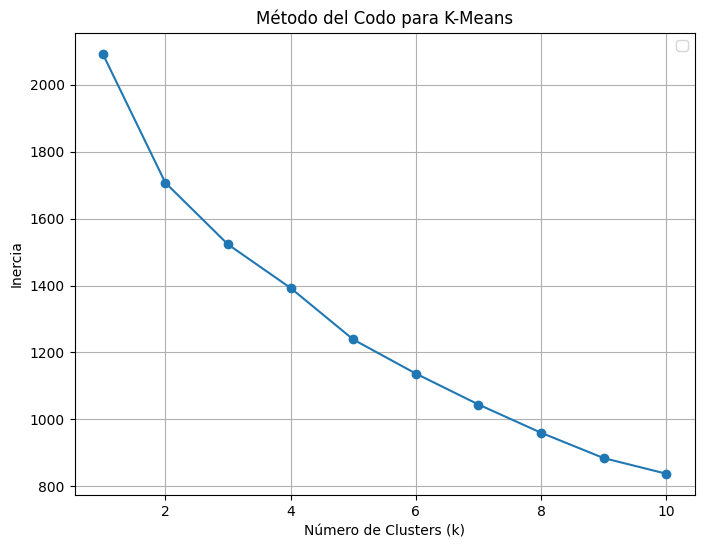

In [33]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_1)
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')

plt.grid()
plt.legend()
plt.show()

El metodo del codo no nos dice ninguna informacion valiosa por comom podemos observar entonces nos guiaremos de la teoria, defiendo el numero de clusters igual a 2 por ser los valores que debemos obtener

In [13]:
# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters = 2, init='random',
    n_init=10, random_state=0
)

In [15]:
y_km = km.fit_predict(scaled_1)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

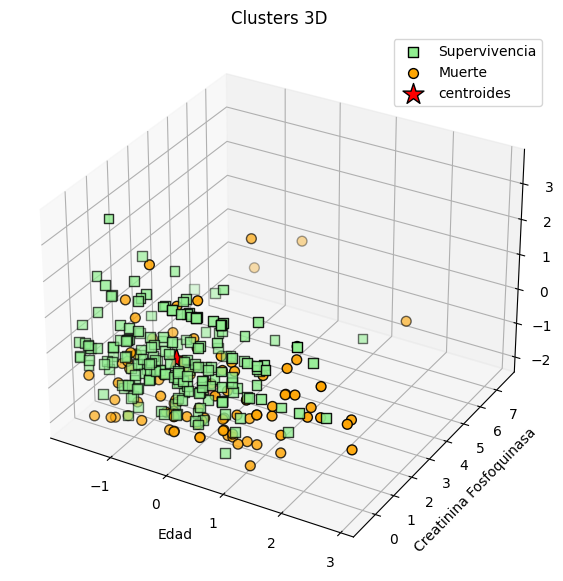

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

columna_1 = 0
columna_2 = 1
columna_3 = 2  # Asegúrate de que tienes una tercer columna en tu matriz de datos.

ax.scatter(
    scaled_1[y_km == 0, columna_1], scaled_1[y_km == 0, columna_2], scaled_1[y_km == 0, columna_3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Supervivencia'
)

ax.scatter(
    scaled_1[y_km == 1, columna_1], scaled_1[y_km == 1, columna_2], scaled_1[y_km == 1, columna_3],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Muerte'
)

ax.scatter(
    km.cluster_centers_[:, columna_1], km.cluster_centers_[:, columna_2], km.cluster_centers_[:, columna_3],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)

ax.set_xlabel('Edad')
ax.set_ylabel('Creatinina Fosfoquinasa')
ax.set_zlabel('Fraccion de eyeccion')
ax.set_title('Clusters 3D')
plt.legend()
plt.grid()
plt.show()


Text(0.5, 23.52222222222222, 'Valores reales')

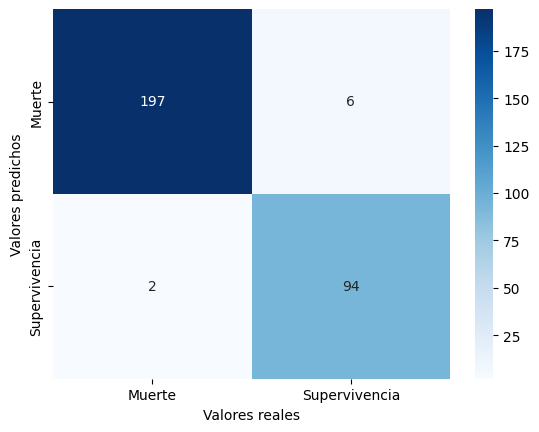

In [20]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(heart_df['DEATH_EVENT'], y_km)

# Heatmap
sns.heatmap(matriz_confusion, annot= True, fmt= 'd', cmap= 'Blues',
            xticklabels= ['Muerte', 'Supervivencia'],
            yticklabels= ['Muerte', 'Supervivencia'])

plt.ylabel('Valores predichos')
plt.xlabel('Valores reales')

In [36]:
# Calcular la precisión del modelo
precision = precision_score(heart_df['DEATH_EVENT'], y_km)
# Calcular la exactitud
exactitud = accuracy_score(heart_df['DEATH_EVENT'], y_km)
# Calcular el recall
recall = recall_score(heart_df['DEATH_EVENT'], y_km)
# Calcular el F1-score
f1 = f1_score(heart_df['DEATH_EVENT'], y_km)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.97
Precisión: 0.94
Recall: 0.98
F1-score: 0.96


Como podemos observar la precision del modelo es bastante alta

### Clustering Jerarquico

In [38]:
H = linkage(scaled_1, 'single')

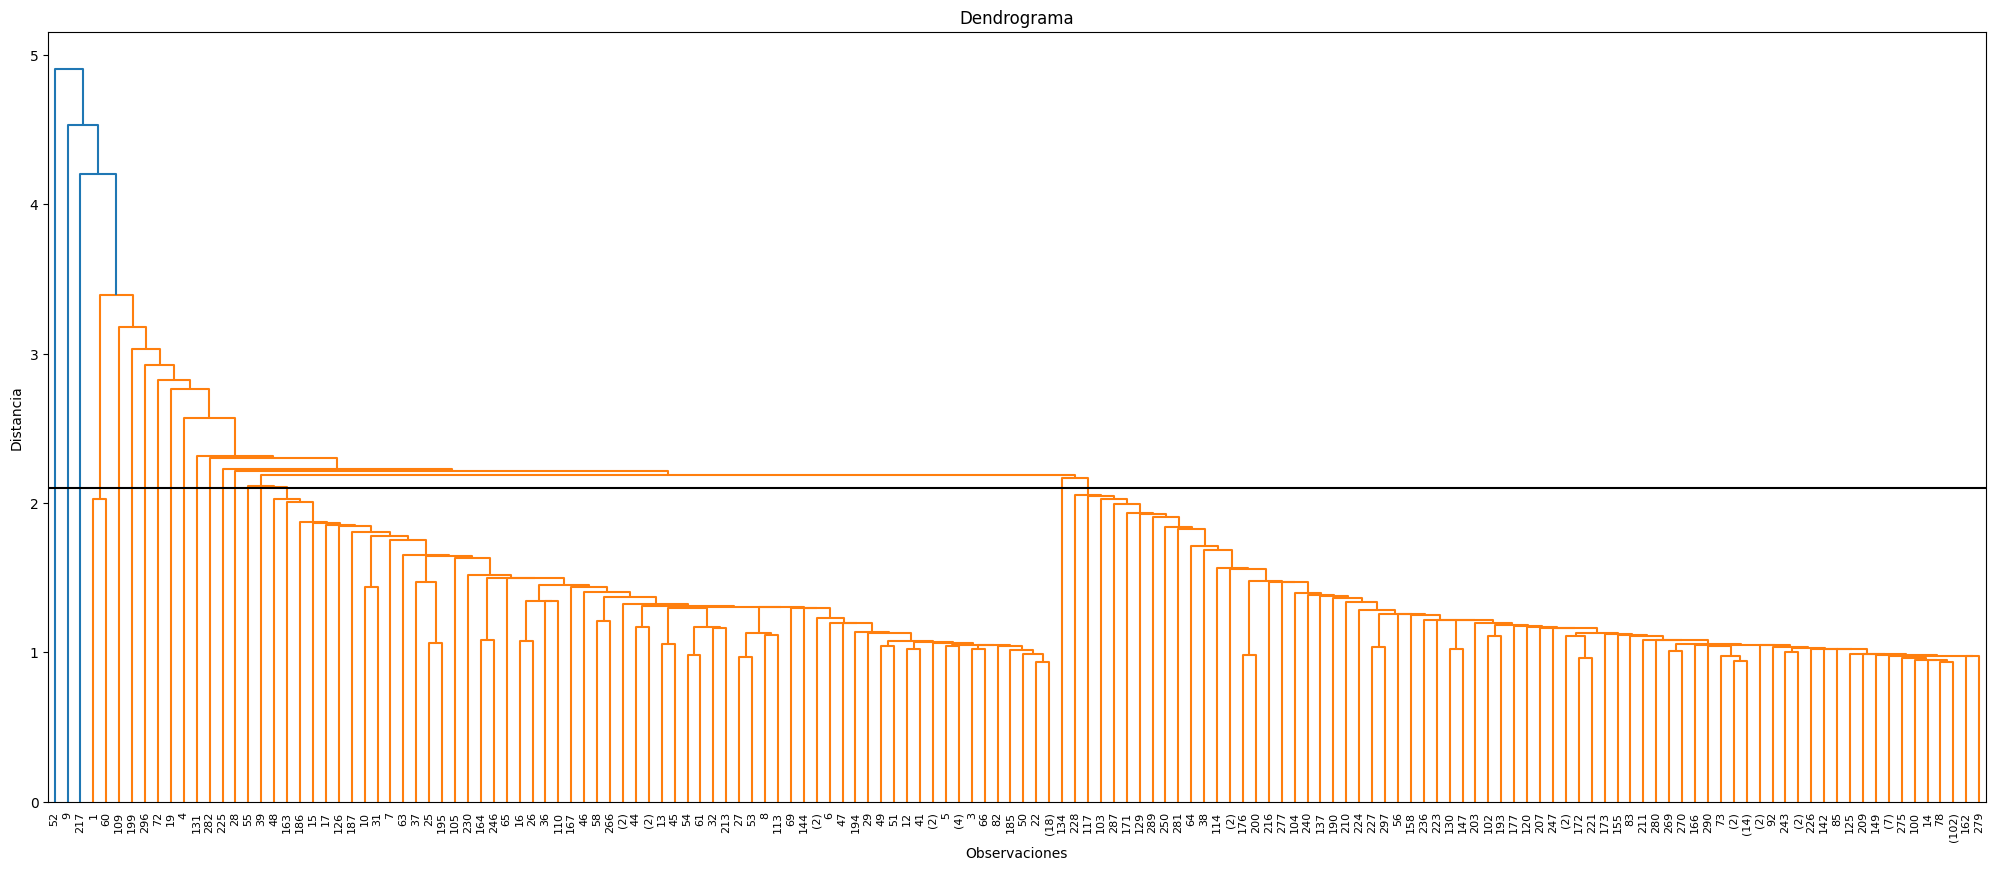

In [44]:
max_d = 2.1
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

In [68]:
from scipy.cluster.hierarchy import fcluster

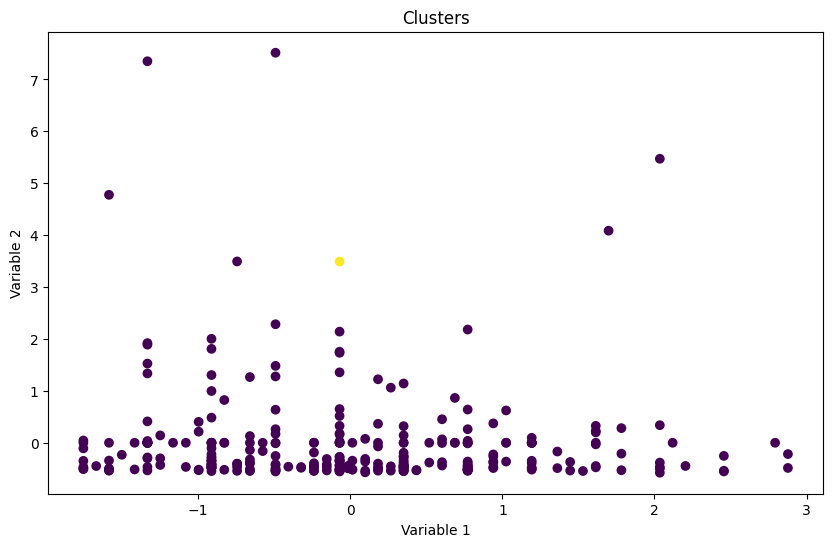

In [69]:
# Especificar el número de clusters que deseas obtener
num_clusters = 2    

# Realizar el corte en el dendrograma para obtener los clusters
clusters = fcluster(H, num_clusters, criterion='maxclust')

# Graficar los puntos con colores según el cluster al que pertenecen
plt.figure(figsize=(10, 6))
plt.scatter(scaled_1[:, 0], scaled_1[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

# Mostrar el gráfico
plt.show()


### Metricas de evaluacion para clustering

Vamos a verificar que tan efectivo es el modelo por medio  del indice de la silueta.
- 1 indica buena asignacion, -1 una mala asignacion

In [73]:
from sklearn.metrics import silhouette_score

list_k = list(range(2,5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_1)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled_1, preds)
    print ("Para n_clusters =" + str(n_clusters) + " el puntaje de silhouette es " + str(score))

Para n_clusters =2 el puntaje de silhouette es 0.2627856940150187
Para n_clusters =3 el puntaje de silhouette es 0.2680571903700331
Para n_clusters =4 el puntaje de silhouette es 0.2689053255407618


C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

### **Modelo predictiva**

In [45]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [46]:
for i in heart_df.columns:
    heart_df[i] = remove_outliers_iqr(heart_df[i])

**Variables**:

**Explicada (Y)**: 
- Evento de muerte

**Explicatorias (X)**: 
- Edad
- Creatinina fosfoquinasa
- Fracción de eyección
- Plaquetas
- Creatinina en suero
- Sodio en suero

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

**Datos de entrenamiento**

In [48]:
x = heart_df.drop(columns=['DEATH_EVENT']) # Explicatoria
y = heart_df['DEATH_EVENT'] # Explicada

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [51]:
modelo = LogisticRegression(max_iter= 1000)
modelo.fit(x_train, y_train)

y_predi = modelo.predict(x_test)

**Matriz de confusión**

Text(0.5, 23.52222222222222, 'Valores reales')

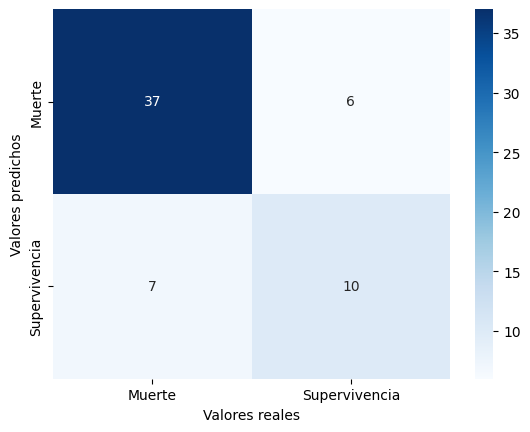

In [53]:
matriz_confusion = confusion_matrix(y_test, y_predi)

# Heatmap
sns.heatmap(matriz_confusion, annot= True, fmt= 'd', cmap= 'Blues',
            xticklabels= ['Muerte', 'Supervivencia'],
            yticklabels= ['Muerte', 'Supervivencia'])

plt.ylabel('Valores predichos')
plt.xlabel('Valores reales')

**Cálculo de metricas de evaluación**

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [54]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_predi)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_predi)
# Calcular el recall
recall = recall_score(y_test, y_predi)
# Calcular el F1-score
f1 = f1_score(y_test, y_predi)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.78
Precisión: 0.62
Recall: 0.59
F1-score: 0.61


El porcentaje del cual se debe tener más atención es el Recall, ya que existe una probabilidad del 59% de que la predicción no sea Falso Negativo. Es decir, un 41% de las predicciones que asuman supervivencia acaben en realidad con la muerte del paciente.

### **Resultados y evaluacion del modelo**

- 